In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [105]:
df=pd.read_csv("stockmarket.csv")

In [107]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


In [109]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
dividend_amount    0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4083 non-null   object 
 1   open             4083 non-null   float64
 2   high             4083 non-null   float64
 3   low              4083 non-null   float64
 4   close            4083 non-null   float64
 5   volume           4083 non-null   float64
 6   dividend_amount  4083 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.4+ KB


In [113]:
df['date']=pd.to_datetime(df['date'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4083 non-null   datetime64[ns]
 1   open             4083 non-null   float64       
 2   high             4083 non-null   float64       
 3   low              4083 non-null   float64       
 4   close            4083 non-null   float64       
 5   volume           4083 non-null   float64       
 6   dividend_amount  4083 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 223.4 KB


<Axes: xlabel='date', ylabel='close'>

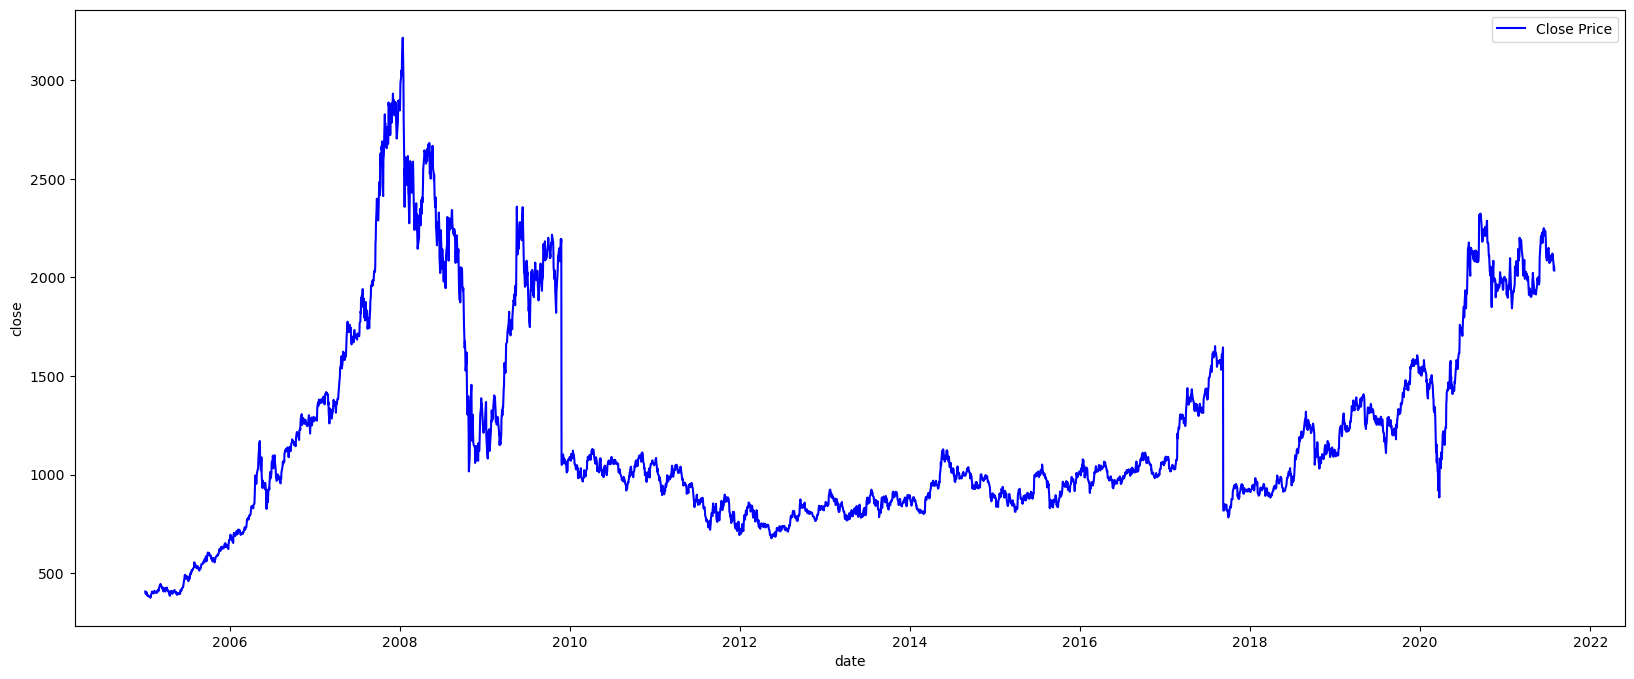

In [117]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df['date'], y='close', label='Close Price', color='blue')
# sns.lineplot(data=df, x=df.index, y='open', label='Open Price', color='green', linestyle='--', marker='o')

<Axes: xlabel='None', ylabel='open'>

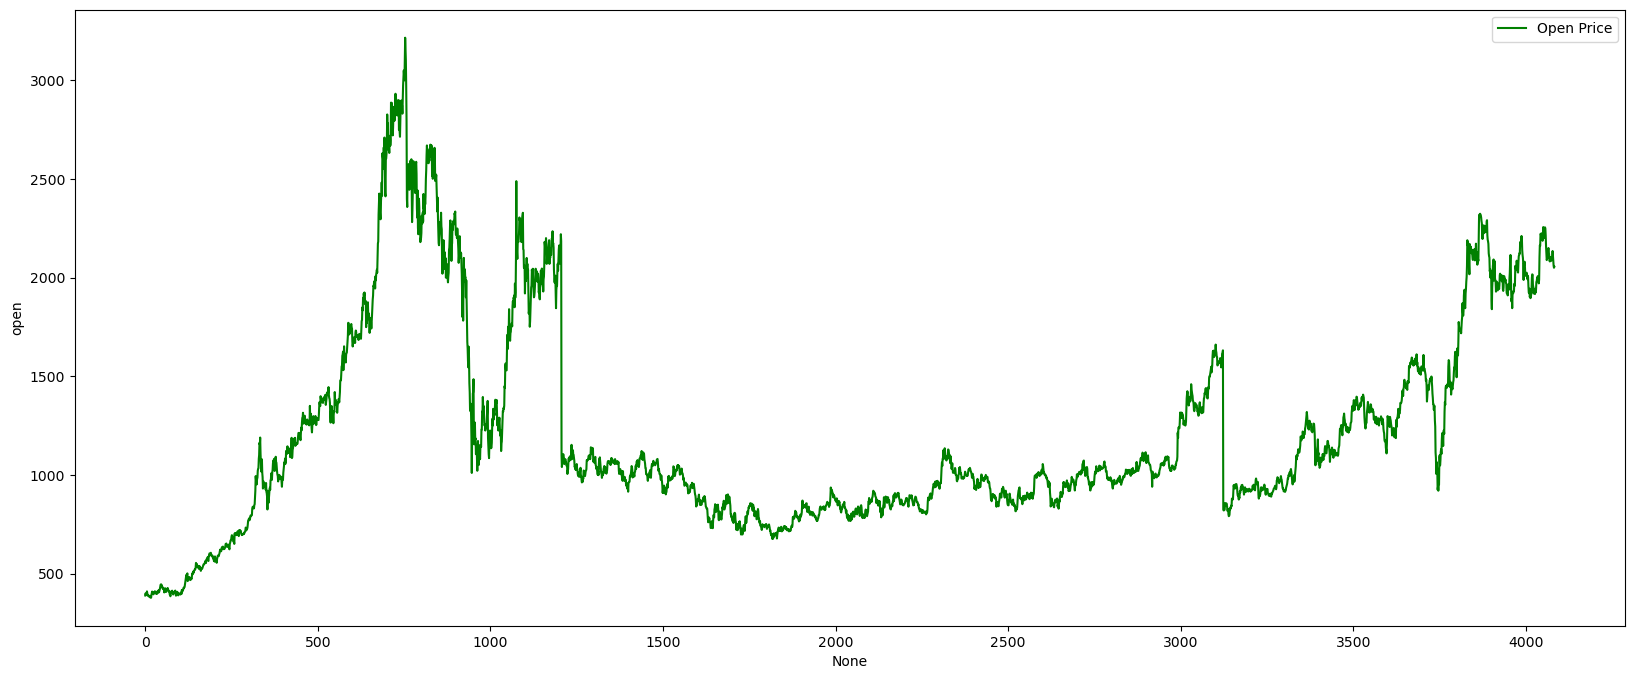

In [118]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x=df.index, y='open', label='Open Price', color='green')

In [120]:
df['MA_3'] = df['close'].rolling(window=3).mean()#3 days moving average
df['MA_5'] = df['close'].rolling(window=5).mean()#5 days moving average

<Axes: xlabel='date', ylabel='MA_3'>

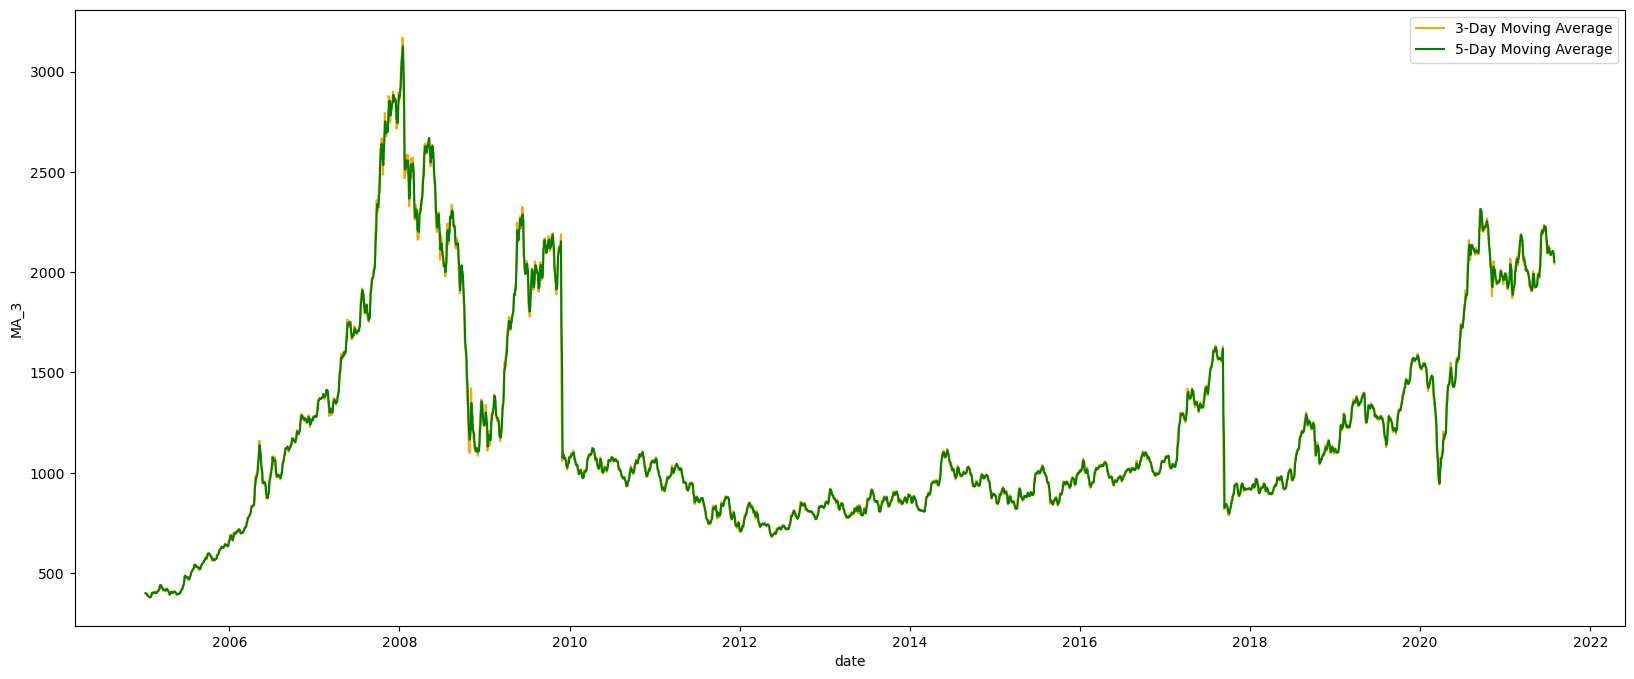

In [121]:
plt.figure(figsize=(20,8))


sns.lineplot(data=df, x=df['date'], y='MA_3', label='3-Day Moving Average', color='orange')
sns.lineplot(data=df, x=df['date'], y='MA_5', label='5-Day Moving Average', color='green')


<Figure size 1200x800 with 0 Axes>

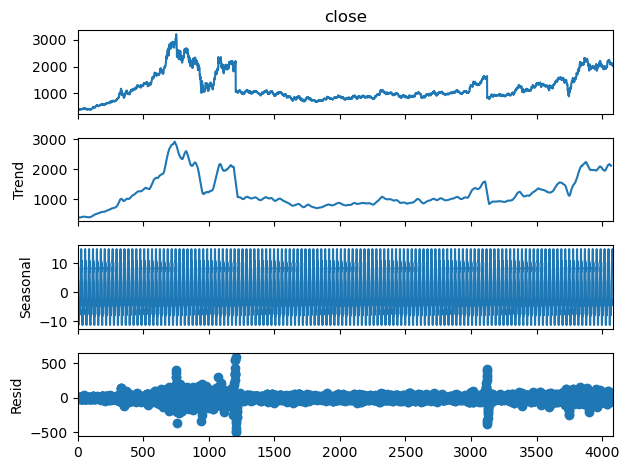

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['close'], model='additive', period=30)  # For monthly seasonality

# Plotting the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

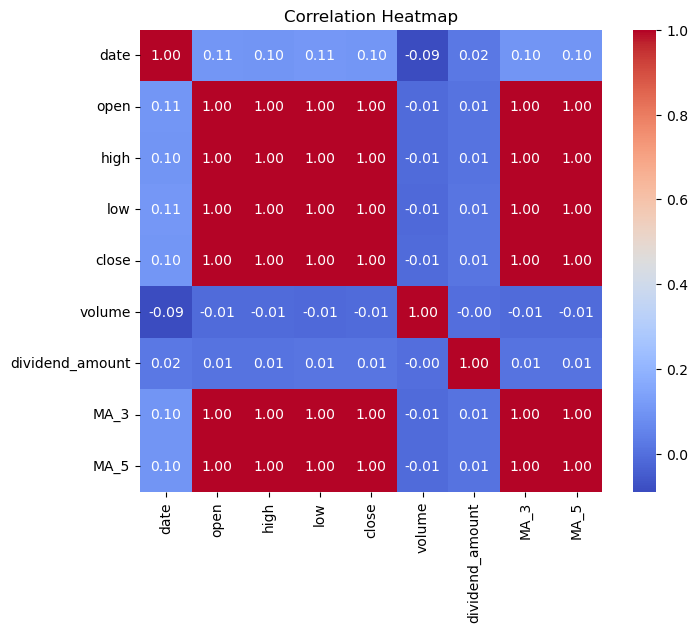

In [125]:
correlation_matrix = df.corr()



# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [129]:
df.set_index('date', inplace=True)


In [131]:
df.head()

,open,high,low,close,volume,dividend_amount,MA_3,MA_5
date,,,,,,,,
2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0,NaN,NaN
2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0,NaN,NaN
2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0,399.645467,NaN
2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0,395.371933,NaN
2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0,397.876200,399.28662


ADF Statistic: -2.1472574638950443
p-value: 0.22594134052163567
Forecasted Values: 4083    2032.433205
4084    2030.167708
4085    2027.908498
4086    2025.655555
4087    2023.408864
           ...     
4178    1843.009680
4179    1841.269754
4180    1839.534655
4181    1837.804371
4182    1836.078887
Name: predicted_mean, Length: 100, dtype: float64


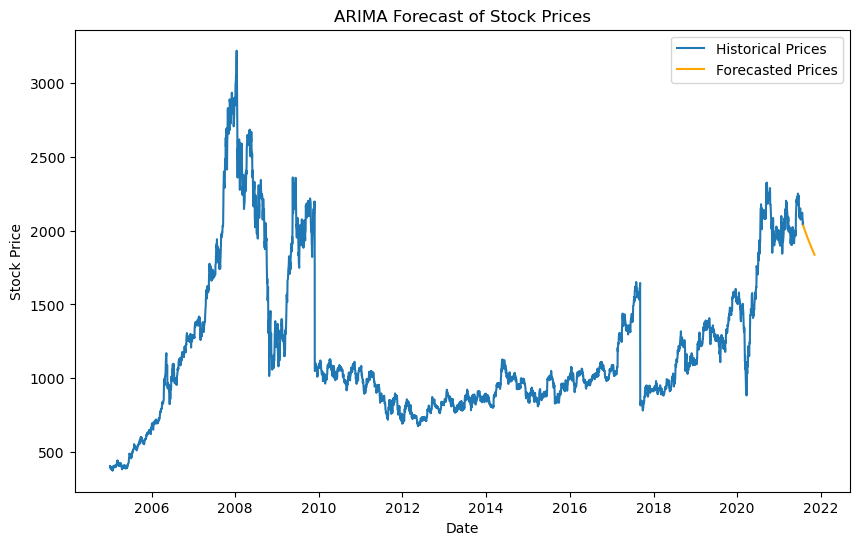

In [133]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit the ARIMA model (assuming differencing is not needed for this example)
model = ARIMA(df['close'], order=(1, 0, 1))  # p=1, d=0, q=1 (you can tune these values)
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=100)  # Forecasting next 5 time steps
print('Forecasted Values:', forecast)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Historical Prices')
plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=100), forecast, label='Forecasted Prices', color='orange')
plt.title('ARIMA Forecast of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()